## &#x1F310; &nbsp; Code Library, Style, and Links

In [1]:
%%html
<style> 
@import url('https://fonts.googleapis.com/css?family=Orbitron|Roboto');
body {background-color: gainsboro;} 
a {color: #37c9e1; font-family: 'Roboto';} 
h1 {color: #37c9e1; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;} 
h2, h3 {color: slategray; font-family: 'Orbitron'; text-shadow: 4px 4px 4px #aaa;}
h4 {color: #818286; font-family: 'Roboto';}
span {text-shadow: 4px 4px 4px #aaa;}
div.output_prompt, div.output_area pre {color: slategray;}
div.input_prompt, div.output_subarea {color: #37c9e1;}      
div.output_stderr pre {background-color: gainsboro;}  
div.output_stderr {background-color: slategrey;}       
</style>

In [2]:
import numpy as np 
import pandas as pd

import matplotlib.pylab as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline

## &#x1F310; &nbsp; Load and Preprocess the Data

In [41]:
school_explorer = pd.read_csv('2016 School Explorer.csv')
d5_shsat = pd.read_csv('D5 SHSAT Registrations and Testers.csv')
school_explorer.shape, d5_shsat.shape

((1272, 161), (140, 7))

In [42]:
# Fillna or replace values
school_explorer = school_explorer.drop(['Adjusted Grade',
                                        'New?',
                                        'Other Location Code in LCGMS'], 
                                       axis=1)
school_explorer.loc[[427,1023,712,908],'School Name'] = \
['P.S. 212 D12','P.S. 212 D30','P.S. 253 D21','P.S. 253 D27']

percent_list = ['Percent ELL','Percent Asian','Percent Black',
                'Percent Hispanic','Percent Black / Hispanic',
                'Percent White','Student Attendance Rate',
                'Percent of Students Chronically Absent',
                'Rigorous Instruction %','Collaborative Teachers %',
                'Supportive Environment %','Effective School Leadership %',
                'Strong Family-Community Ties %','Trust %']

for el in percent_list:
    school_explorer[el] = school_explorer[el].astype('str')
    school_explorer[el] = school_explorer[el].str.replace("%", "")
    school_explorer[el] = school_explorer[el].str.replace("nan", "0")
    school_explorer[el] = school_explorer[el].astype(float)
    school_explorer[el].replace(0, np.NaN, inplace=True)
    school_explorer[el] = school_explorer[el].interpolate()
    
school_explorer['Economic Need Index'] = \
school_explorer['Economic Need Index'].interpolate()
school_explorer['Average ELA Proficiency'] = \
school_explorer['Average ELA Proficiency'].interpolate()
school_explorer['Average Math Proficiency'] = \
school_explorer['Average Math Proficiency'].interpolate()

school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].astype('str') 
for s in [",","$"," "]:
    school_explorer['School Income Estimate'] = \
    school_explorer['School Income Estimate'].str.replace(s, "")
school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].str.replace("nan", "0")

school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].astype(float)
school_explorer['School Income Estimate'].replace(0, np.NaN, inplace=True)
school_explorer['School Income Estimate'] = \
school_explorer['School Income Estimate'].interpolate()

rating_list = ['Rigorous Instruction Rating','Collaborative Teachers Rating',
               'Supportive Environment Rating','Effective School Leadership Rating',
               'Strong Family-Community Ties Rating','Strong Family-Community Ties Rating',
               'Trust Rating','Student Achievement Rating']

for el in rating_list:
    moda_value = school_explorer[el].value_counts().idxmax()
    school_explorer[el] = school_explorer[el].fillna(moda_value) 
    
print('NaN count = ', sum(school_explorer.isna().sum()))    

NaN count =  0


In [43]:
# Describe numeric variables
school_explorer.describe(include=[np.number]).T.head(23)

,count,mean,std,min,25%,50%,75%,max
SED Code,1272.0,3.286698e+11,1.222022e+10,3.075000e+11,3.208752e+11,3.315004e+11,3.424000e+11,3.531009e+11
District,1272.0,1.613522e+01,9.245270e+00,1.000000e+00,9.000000e+00,1.500000e+01,2.400000e+01,3.200000e+01
Latitude,1272.0,4.073454e+01,8.660234e-02,4.050780e+01,4.066950e+01,4.072299e+01,4.081563e+01,4.090346e+01
Longitude,1272.0,-7.391835e+01,8.057649e-02,-7.424402e+01,-7.395706e+01,-7.392057e+01,-7.387926e+01,-7.370892e+01
Zip,1272.0,1.081572e+04,5.295889e+02,1.000100e+04,1.045200e+04,1.120300e+04,1.123200e+04,1.169400e+04
Economic Need Index,1272.0,6.719953e-01,2.095183e-01,4.900000e-02,5.510000e-01,7.282500e-01,8.400000e-01,9.570000e-01
School Income Estimate,1272.0,4.801374e+04,2.100769e+04,1.690167e+04,3.338110e+04,4.357179e+04,5.778292e+04,1.813821e+05
Percent ELL,1272.0,1.266392e+01,1.124188e+01,1.000000e+00,4.000000e+00,9.000000e+00,1.800000e+01,9.900000e+01
Percent Asian,1272.0,1.197720e+01,1.748867e+01,1.000000e+00,1.500000e+00,4.000000e+00,1.400000e+01,9.500000e+01
Percent Black,1272.0,3.210299e+01,2.871480e+01,1.000000e+00,7.000000e+00,2.400000e+01,5.525000e+01,9.700000e+01


In [44]:
school_explorer.describe(include=[np.object]).T

,count,unique,top,freq
School Name,1272,1272,P.S. 134 GEORGE F. BRISTOW,1
Location Code,1272,1272,12X047,1
Address (Full),1272,1091,"3750 BAYCHESTER AVE BRONX, NY 10466",3
City,1272,45,BROOKLYN,411
Grades,1272,41,"PK,0K,01,02,03,04,05",400
Grade Low,1272,10,PK,525
Grade High,1272,11,05,626
Community School?,1272,2,No,1196
Rigorous Instruction Rating,1272,4,Meeting Target,629
Collaborative Teachers Rating,1272,4,Meeting Target,651


In [45]:
numeric_list1 = school_explorer.describe(include=[np.number]).columns[:23]
numeric_list2 = school_explorer.describe(include=[np.number]).columns[23:]
object_list = school_explorer.describe(include=[np.object]).columns

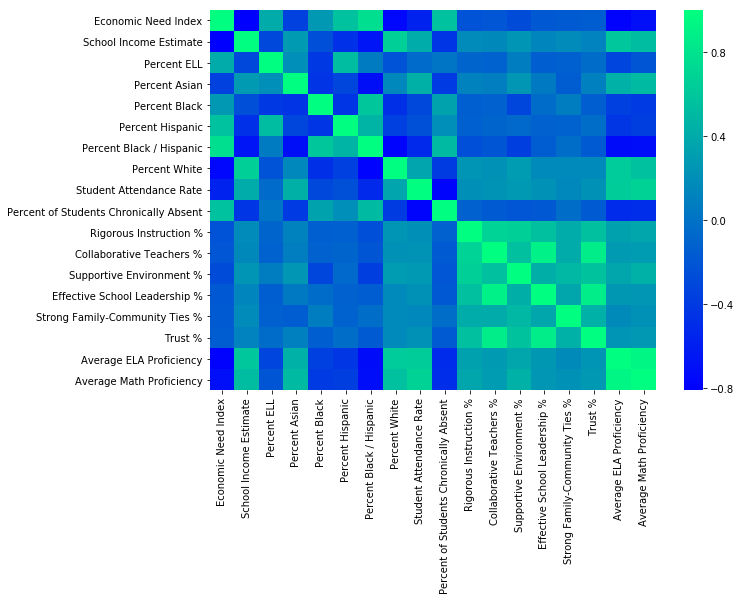

In [50]:
corr_martix = school_explorer[numeric_list1[5:23]].corr()
fig,ax = plt.subplots(1, figsize=(10,7))
sns.heatmap(corr_martix, ax=ax,
            xticklabels=corr_martix.columns.values,
            yticklabels=corr_martix.columns.values,
            cmap="winter");

Of course, the variables `SED Code`, `District`, `Zip` are categorical. 

Just categories are denoted by numeric values.

Let's convert string values of other categorical features into numeric.

In [51]:
print('District: ',set(school_explorer['District']),'\n')
print('City: ',set(school_explorer['City']),'\n')
print('Grades: ',set(school_explorer['Grades']),'\n')
print('Rigorous Instruction Rating: ',set(school_explorer['Rigorous Instruction Rating']),'\n')
print('Collaborative Teachers Rating: ',set(school_explorer['Collaborative Teachers Rating']),'\n')
print('Supportive Environment Rating: ',set(school_explorer['Supportive Environment Rating']),'\n')
print('Effective School Leadership Rating: ',set(school_explorer['Effective School Leadership Rating']),'\n')
print('Strong Family-Community Ties Rating: ',set(school_explorer['Strong Family-Community Ties Rating']),'\n')
print('Trust Rating: ',set(school_explorer['Trust Rating']),'\n')
print('Student Achievement Rating: ',set(school_explorer['Student Achievement Rating']),'\n')

District:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32} 

City:  {'NEW YORK', 'ROOSEVELT ISLAND', 'KEW GARDENS', 'SPRINGFIELD GARDENS', 'HOLLIS', 'JACKSON HEIGHTS', 'EAST ELMHURST', 'ASTORIA', 'JAMAICA', 'BELLEROSE', 'LITTLE NECK', 'SOUTH OZONE PARK', 'OZONE PARK', 'WHITESTONE', 'REGO PARK', 'ARVERNE', 'STATEN ISLAND', 'ROCKAWAY PARK', 'GLENDALE', 'COLLEGE POINT', 'ELMHURST', 'WOODSIDE', 'BROOKLYN', 'FLUSHING', 'QUEENS VILLAGE', 'HOWARD BEACH', 'FAR ROCKAWAY', 'RIDGEWOOD', 'SOUTH RICHMOND HILL', 'ROCKAWAY BEACH', 'CAMBRIA HEIGHTS', 'BROAD CHANNEL', 'SAINT ALBANS', 'BRONX', 'CORONA', 'RICHMOND HILL', 'MASPETH', 'LONG ISLAND CITY', 'DOUGLASTON', 'FOREST HILLS', 'FLORAL PARK', 'BAYSIDE', 'ROSEDALE', 'MIDDLE VILLAGE', 'WOODHAVEN'} 

Grades:  {'PK,0K,01,02', '02,03,04,05', 'PK,0K,01,02,03,04,05,07,08', 'PK,0K,01,03,04,05', '0K', '0K,01,03,04,05,06,07,08', '0K,01,02,03,04,05,06,07', '0K,01,02,03,04,05,06,07,08', 'PK,0

In [52]:
category_list = ['City','Grades','Rigorous Instruction Rating',
                'Collaborative Teachers Rating','Supportive Environment Rating',
                'Effective School Leadership Rating','Strong Family-Community Ties Rating',
                'Trust Rating','Student Achievement Rating']
for feature in category_list:
    feature_cat = pd.factorize(school_explorer[feature])
    school_explorer[feature] = feature_cat[0]

In [60]:
category_list = category_list + ['District']
numeric_list = list(numeric_list1[5:21].append(numeric_list2))
print(category_list, '\n', numeric_list )

['City', 'Grades', 'Rigorous Instruction Rating', 'Collaborative Teachers Rating', 'Supportive Environment Rating', 'Effective School Leadership Rating', 'Strong Family-Community Ties Rating', 'Trust Rating', 'Student Achievement Rating', 'District', 'District', 'District', 'District', 'District', 'District', 'District'] 
 ['Economic Need Index', 'School Income Estimate', 'Percent ELL', 'Percent Asian', 'Percent Black', 'Percent Hispanic', 'Percent Black / Hispanic', 'Percent White', 'Student Attendance Rate', 'Percent of Students Chronically Absent', 'Rigorous Instruction %', 'Collaborative Teachers %', 'Supportive Environment %', 'Effective School Leadership %', 'Strong Family-Community Ties %', 'Trust %', 'Grade 3 ELA - All Students Tested', 'Grade 3 ELA 4s - All Students', 'Grade 3 ELA 4s - American Indian or Alaska Native', 'Grade 3 ELA 4s - Black or African American', 'Grade 3 ELA 4s - Hispanic or Latino', 'Grade 3 ELA 4s - Asian or Pacific Islander', 'Grade 3 ELA 4s - White', 'G

In [53]:
print('District: ',set(school_explorer['District']),'\n')
print('City: ',set(school_explorer['City']),'\n')
print('Grades: ',set(school_explorer['Grades']),'\n')
print('Rigorous Instruction Rating: ',set(school_explorer['Rigorous Instruction Rating']),'\n')
print('Collaborative Teachers Rating: ',set(school_explorer['Collaborative Teachers Rating']),'\n')
print('Supportive Environment Rating: ',set(school_explorer['Supportive Environment Rating']),'\n')
print('Effective School Leadership Rating: ',set(school_explorer['Effective School Leadership Rating']),'\n')
print('Strong Family-Community Ties Rating: ',set(school_explorer['Strong Family-Community Ties Rating']),'\n')
print('Trust Rating: ',set(school_explorer['Trust Rating']),'\n')
print('Student Achievement Rating: ',set(school_explorer['Student Achievement Rating']),'\n')

District:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32} 

City:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44} 

Grades:  {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40} 

Rigorous Instruction Rating:  {0, 1, 2, 3} 

Collaborative Teachers Rating:  {0, 1, 2, 3} 

Supportive Environment Rating:  {0, 1, 2, 3} 

Effective School Leadership Rating:  {0, 1, 2, 3} 

Strong Family-Community Ties Rating:  {0, 1, 2, 3} 

Trust Rating:  {0, 1, 2, 3} 

Student Achievement Rating:  {0, 1, 2, 3} 

